# DNP Spectrum Analysis

In [1]:
import sys

import pyNMR.model.parser.topSpin as T
import pyNMR.model.processor as P
import pyNMR.model.operations as O

import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2

Left Shift
Exponential Linebroadening
LB: 0.2 Hz
Fourier Transform
Phase Zero Order


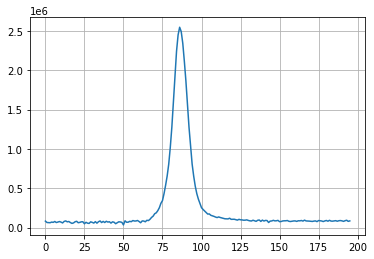

In [2]:
data = T.TopSpin("./data/bruker/dnp_210316_1_solids/1/")

Processor = P.Processor([O.LeftShift(21),
                         O.LineBroadening(0.2),
                         O.FourierTransform(),
                       O.Phase0D(190)])
Processor.runStack(data)

OP = O.GetPartialSpectrum(15, -200e3, 200e3)
spec = OP.run(data)
plt.plot(spec)
plt.grid()

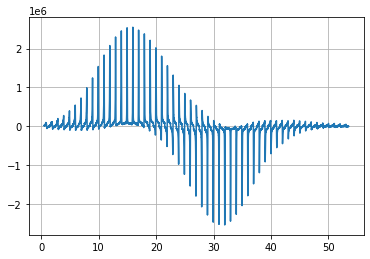

In [3]:
OP = O.GetJoinedPartialSpectra(-200e3, 200e3, returnX=True)
x, spec = OP.run(data)


plt.plot(x, spec)
plt.grid()

In [4]:
OP = O.GetAllIntegrals(-200e3, 200e3)
OP2 = O.GetAllPhases(-200e3, 200e3, unwrap = True)
myList = OP.run(data)
myPhaseList = OP2.run(data)

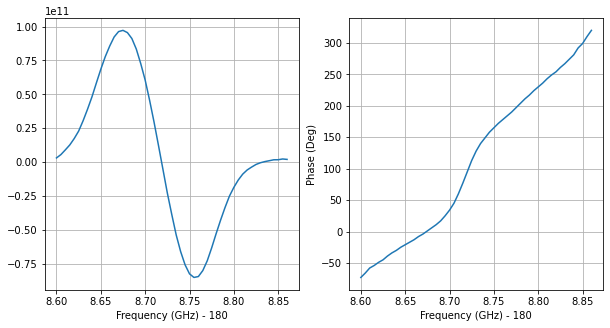

In [5]:
xAxis = np.array([188.6 + 0.005*i for i in range(53)]) - 180

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(xAxis, myList)
plt.xlabel("Frequency (GHz) - 180")
plt.grid()
plt.subplot(1,2,2)
plt.ylabel("Phase (Deg)")
plt.xlabel("Frequency (GHz) - 180")
plt.grid()
plt.plot(xAxis,myPhaseList)

In [7]:
print(data.title)